In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 97% 596M/612M [00:05<00:00, 62.9MB/s]
100% 612M/612M [00:05<00:00, 122MB/s] 


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import load_model

In [4]:
from zipfile import ZipFile
zipext = ZipFile("/content/gtsrb-german-traffic-sign.zip",'r')
zipext.extractall("/content")
zipext.close()

In [5]:
df = pd.read_csv("/content/Train.csv")

In [6]:
imgs_path = "/content/train"
data = []
labels = []
CLASSES = 43
# using for loop to access each image
for i in range(CLASSES):
    img_path = os.path.join(imgs_path, str(i)) #0-42
    for img in os.listdir(img_path):
        im = Image.open(imgs_path + '/' + str(i) + '/' + img)
        im = im.resize((30,30))
        im = np.array(im)
        data.append(im)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)
print("data[0]: ",data[0])
print("labels[0: ]",labels[0])


data[0]:  [[[ 73  67  65]
  [133  95  90]
  [190 117 114]
  ...
  [124  87  82]
  [ 89  76  73]
  [ 82  74  74]]

 [[ 83  75  73]
  [163 113 107]
  [195 108  92]
  ...
  [165 105  94]
  [ 96  81  77]
  [ 71  66  67]]

 [[ 99  83  92]
  [175 111 118]
  [172  71  61]
  ...
  [156  91  76]
  [112  97  85]
  [ 69  67  64]]

 ...

 [[116 111  79]
  [157 139  83]
  [172 149  92]
  ...
  [ 71  70  71]
  [ 70  70  70]
  [ 75  74  73]]

 [[131 113  57]
  [144 116  50]
  [207 178  96]
  ...
  [ 76  73  75]
  [ 67  67  68]
  [ 70  71  72]]

 [[177 142  70]
  [179 126  81]
  [244 194 110]
  ...
  [ 85  81  85]
  [ 68  66  71]
  [ 68  68  74]]]
labels[0: ] 0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("training shape: ",x_train.shape, y_train.shape)
print("testing shape: ",x_test.shape, y_test.shape)
# convert interge label to one-hot data
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(y_train[1])


training shape:  (31367, 30, 30, 3) (31367,)
testing shape:  (7842, 30, 30, 3) (7842,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dropout(rate=0.5))

model.add(Dense(43, activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
epochs = 15
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 16s 8ms/step - loss: 2.5122 - accuracy: 0.3966 - val_loss: 0.9099 - val_accuracy: 0.7575
Epoch 2/15
491/491 [==============================] - 3s 7ms/step - loss: 0.8649 - accuracy: 0.7545 - val_loss: 0.2733 - val_accuracy: 0.9342
Epoch 3/15
491/491 [==============================] - 3s 7ms/step - loss: 0.5034 - accuracy: 0.8532 - val_loss: 0.1534 - val_accuracy: 0.9583
Epoch 4/15
491/491 [==============================] - 4s 8ms/step - loss: 0.3569 - accuracy: 0.8965 - val_loss: 0.1365 - val_accuracy: 0.9630
Epoch 5/15
491/491 [==============================] - 3s 7ms/step - loss: 0.2733 - accuracy: 0.9210 - val_loss: 0.0815 - val_accuracy: 0.9777
Epoch 6/15
491/491 [==============================] - 3s 7ms/step - loss: 0.2436 - accuracy: 0.9320 - val_loss: 0.0809 - val_accuracy: 0.9768
Epoch 7/15
491/491 [==============================] - 3s 7ms/step - loss: 0.2219 - accuracy: 0.9369 - val_loss: 0.0834 - val_accuracy: 0.9774
Epoch

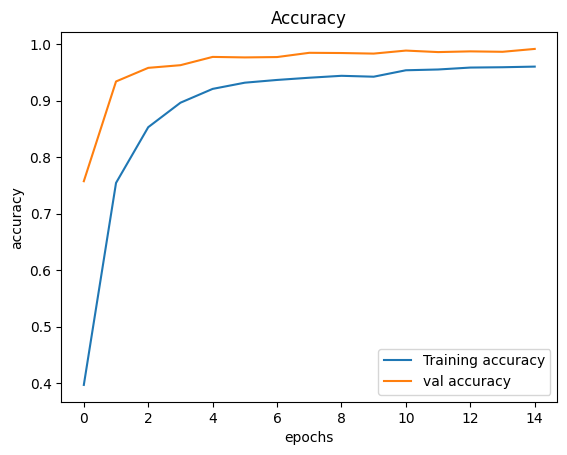

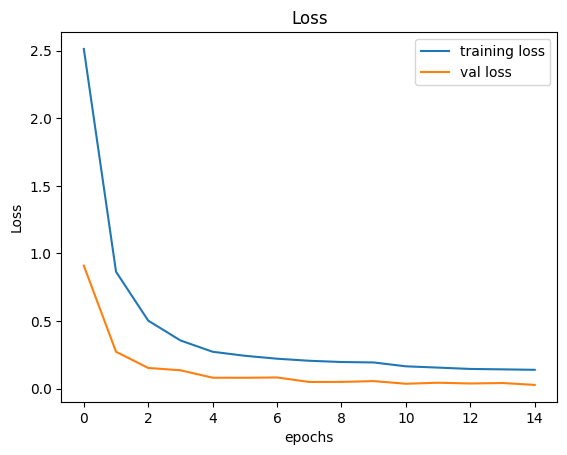

In [11]:
plt.figure(0) #underfitting
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('underfitting.png')
plt.figure(1) #overfiting
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig('overfiting.png')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score
test = pd.read_csv("/content/Test.csv")
test_labels = test['ClassId'].values.tolist()

test_img_path = "/content"
test_imgs = test['Path'].values
test_data = []

for img in test_imgs:
    im = Image.open(test_img_path + '/' + img)
    im = im.resize((30,30))
    im = np.array(im)
    test_data.append(im)
test_data = np.array(test_data)
predictions = model.predict(test_data)
classes_x = np.argmax(predictions, axis = 1).tolist()
classes_x = np.array([classes_x]).tolist()[0]

print("accuracy: ", accuracy_score(test_labels, classes_x))

395/395 [==============================] - 1s 2ms/step
accuracy:  0.9605700712589074


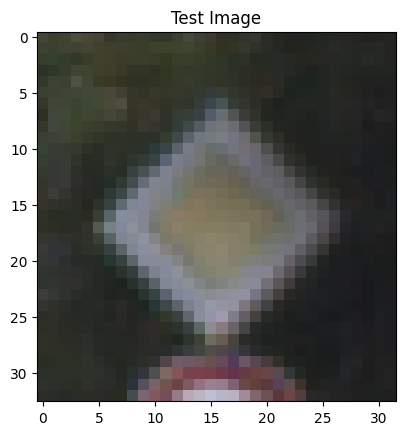

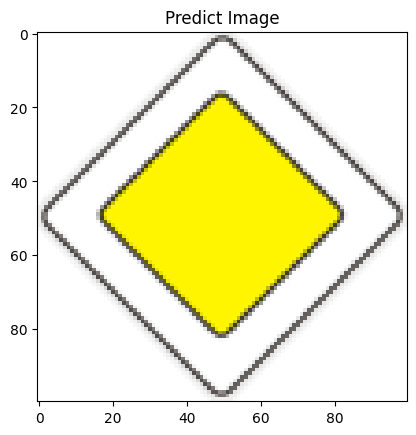

In [18]:
number_of_image_test = 7 #20

test_image_name = test_imgs[number_of_image_test]
image_label = test_labels[number_of_image_test]
plt.figure(0)
img_path = test_img_path + '/' + test_image_name
img = Image.open(img_path)
plt.imshow(img)
plt.title("Test Image")
plt.figure(1)
img_pre = Image.open('/content/Meta/' + str(classes_x[number_of_image_test]) + '.png')
plt.imshow(img_pre)
plt.title("Predict Image")
plt.show()

In [19]:
import cv2

In [23]:
def Check_Output(img):
  image = cv2.imread(img)
  image = cv2.resize(image,(30,30))
  image = image.reshape(1,30,30,3)
  pred = model.predict(image)
  # if pred == 0:
  #   return("AI generated Art")
  # else:
  #   return("Non AI generated Art")
  return np.argmax(pred)

In [29]:
image1 = "/content/00005_00000_00006.png"

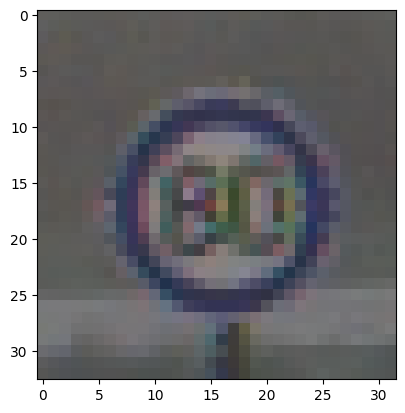

In [30]:
img = cv2.imread(image1)
plt.imshow(img)

In [31]:
Check_Output(image1)

1/1 [==============================] - 0s 19ms/step


5